In [53]:
import igl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz
import meshplot as mp

# 指定STL或OBJ檔案的路徑
stl_file_path = 'fandisk.obj'

# 從指定檔案讀取三角網格數據
v, f = igl.read_triangle_mesh(stl_file_path)

# 計算法向量
n = igl.per_vertex_normals(v, f)

# 將法向量歸一化
n_normalized = n / np.linalg.norm(n, axis=1)[:, np.newaxis]
v_normalized = v / np.linalg.norm(n, axis=1)[:, np.newaxis]


In [102]:
# zero_matrix = np.zeros((6475, 3))
combined_vector = np.concatenate((n_normalized, v*1.3), axis=1)
# cv_normalized = n / np.linalg.norm(combined_vector, axis=1)[:, np.newaxis]

In [103]:
from sklearn.cluster import DBSCAN
# 使用 DBSCAN 算法進行分群
dbscan = DBSCAN(eps=0.1, min_samples=6)  # 根據需要調整參數
labels_db = dbscan.fit_predict(combined_vector)
labels_db=labels_db+1
 # 將群組標籤轉換為整數
# labels = labels.astype(int)
np.savetxt('labels_bd.txt', labels_db, fmt='%d')
print(labels_db.dtype)
print(labels_db.shape)

int64
(6475,)


In [104]:
unique_labels = np.unique(labels_db)
num_clusters = len(unique_labels)

print("分群數量：", num_clusters)

分群數量： 7


[   0    1    2 ... 6472 6473 6474]
[2262 2263 2264 2288 2298 2299]
[2532 2574 2575 2576 2616 2617 2618 2659]
[2662 2663 2665 2709 2710 2711 2712 2755 2757 2758 2759 2804 2806]
[2652 2696 2697 2698 2745 2747 2748 2794]
[3004 3005 3006 3057 3058 3059 3060 3111 3112]
[3235 3236 3253 3256 3257 3258 3259 3260 3273 3274 3275 3276 3280 3281
 3282 3295 3296 3297 3298 3302 3303 3315 3316]


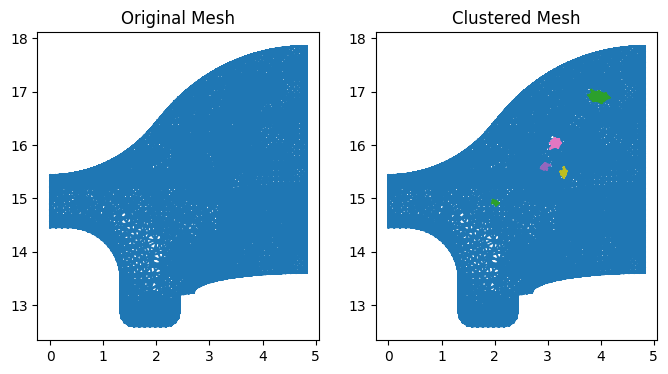

In [105]:
# 準備可視化
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# 在左側的子圖中繪製原始三角網格
ax0.set_title('Original Mesh')
ax0.triplot(v[:, 0], v[:, 1], f)

# 在右側的子圖中繪製分群後的三角網格
ax1.set_title('Clustered Mesh')
for cluster_label in range(num_clusters):
    cluster_indices = np.where(labels_db == cluster_label)[0]
    print(cluster_indices)
    if len(cluster_indices) > 0:
        cluster_vertices = v[cluster_indices]
        cluster_faces = np.array([
            [np.where(cluster_indices == i)[0][0] for i in face]
            for face in f
            if all(np.isin(face, cluster_indices))
        ], dtype=int)

        # 確保 cluster_faces 至少包含一些有效的三角形
        if len(cluster_faces) > 0 and len(cluster_faces[0]) > 0:
            ax1.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)

            igl.write_triangle_mesh(f'cluster_n{cluster_label}.stl', cluster_vertices, cluster_faces)


        

plt.show()